<a href="https://colab.research.google.com/github/Christinathattil/AML/blob/Main/Polynomial_reg1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### **SIMPLE LINEAR REGRESSION WITH 100 RANDOM VARIABLES** ###

Text(0, 0.5, 'Y points')

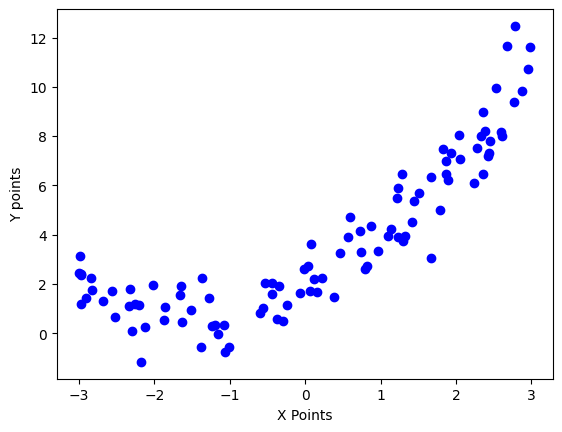

In [47]:
x=6 * np.random.rand(100,1)-3
y=0.5 * x**2 + 1.5*x + 2 + np.random.randn(100,1)  #Quadratic equation used
plt.scatter(x,y,color='b')
plt.xlabel('X Points')
plt.ylabel('Y points')

In the above code :  

x=6 * np.random.rand(100,1)-3: This generates 100 random numbers in the range [-3, 3) as x-coordinates for our data points.
y=0.5 * x**2 + 1.5*x + 2 + np.random.randn(100,1): This line represents a quadratic equation (0.5 * x**2 + 1.5*x + 2) with added random noise (np.random.randn(100,1)) to simulate real-world data. This equation generates y-coordinates corresponding to the x-values previously generated.

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

from sklearn.linear_model import LinearRegression
reg_model1=LinearRegression()

reg_model1.fit(x_train,y_train)

LinearRegression()

In [49]:
from sklearn.metrics import r2_score
score1=r2_score(y_test,reg_model1.predict(x_test))
print(score1)


0.595800927084481


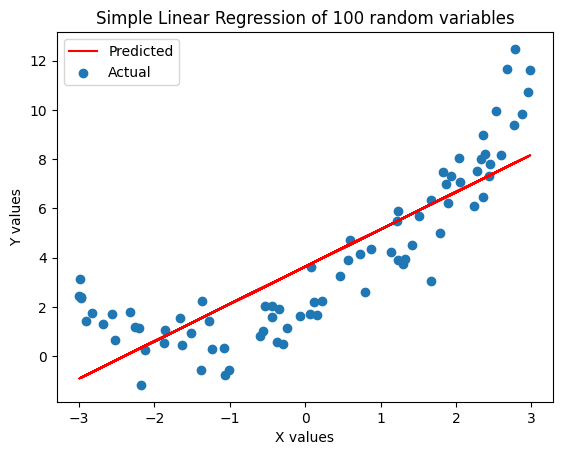

In [50]:
plt.plot(x_train,reg_model1.predict(x_train),color='r', label='Predicted')
plt.scatter(x_train,y_train, label='Actual')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Simple Linear Regression of 100 random variables")
plt.legend()
plt.show()

## **POLYNOMIAL REGRESSION OF DEGREE = 2**

In [51]:
from sklearn.preprocessing import PolynomialFeatures

In [52]:
p=PolynomialFeatures(degree=2, include_bias=True)
x_train_p=p.fit_transform(x_train)
x_test_p=p.transform(x_test)

In [53]:
x_train_p

array([[ 1.00000000e+00,  1.67134320e+00,  2.79338808e+00],
       [ 1.00000000e+00,  7.31626212e-01,  5.35276915e-01],
       [ 1.00000000e+00,  2.79046827e+00,  7.78671317e+00],
       [ 1.00000000e+00, -2.12758513e+00,  4.52661848e+00],
       [ 1.00000000e+00, -1.51068573e+00,  2.28217136e+00],
       [ 1.00000000e+00,  2.98764019e+00,  8.92599390e+00],
       [ 1.00000000e+00, -1.06753236e+00,  1.13962534e+00],
       [ 1.00000000e+00, -1.36750809e+00,  1.87007837e+00],
       [ 1.00000000e+00,  6.35295543e-02,  4.03600427e-03],
       [ 1.00000000e+00, -2.25376508e+00,  5.07945702e+00],
       [ 1.00000000e+00,  5.73980737e-01,  3.29453886e-01],
       [ 1.00000000e+00,  2.45565142e+00,  6.03022389e+00],
       [ 1.00000000e+00, -2.52071613e+00,  6.35400979e+00],
       [ 1.00000000e+00,  2.24185801e+00,  5.02592732e+00],
       [ 1.00000000e+00,  2.59364037e+00,  6.72697039e+00],
       [ 1.00000000e+00,  8.13438932e-02,  6.61682895e-03],
       [ 1.00000000e+00,  2.38259839e+00

In [54]:
x_test_p

array([[ 1.00000000e+00, -1.15011221e+00,  1.32275810e+00],
       [ 1.00000000e+00, -2.84430384e+00,  8.09006432e+00],
       [ 1.00000000e+00,  2.61045354e+00,  6.81446771e+00],
       [ 1.00000000e+00,  1.44598457e+00,  2.09087139e+00],
       [ 1.00000000e+00,  8.19367552e-01,  6.71363186e-01],
       [ 1.00000000e+00,  1.28269642e+00,  1.64531010e+00],
       [ 1.00000000e+00,  3.54173405e-02,  1.25438801e-03],
       [ 1.00000000e+00,  2.43101878e+00,  5.90985229e+00],
       [ 1.00000000e+00, -2.34013490e+00,  5.47623137e+00],
       [ 1.00000000e+00,  7.36142092e-01,  5.41905180e-01],
       [ 1.00000000e+00,  1.87072249e+00,  3.49960263e+00],
       [ 1.00000000e+00, -2.97872370e+00,  8.87279491e+00],
       [ 1.00000000e+00,  1.09954739e+00,  1.20900447e+00],
       [ 1.00000000e+00, -1.64993772e+00,  2.72229447e+00],
       [ 1.00000000e+00,  9.61579025e-01,  9.24634221e-01],
       [ 1.00000000e+00, -2.29423996e+00,  5.26353699e+00],
       [ 1.00000000e+00, -2.03883148e-02

In [55]:
reg_model2=LinearRegression()
reg_model2.fit(x_train_p,y_train)
y_predict2=reg_model2.predict(x_test_p)
score2=r2_score(y_test, y_predict2)
print(score2)

0.8603153665084091


In [56]:
print(reg_model2.coef_)
print(reg_model2.intercept_)

[[0.         1.50745136 0.52232243]]
[1.82291467]


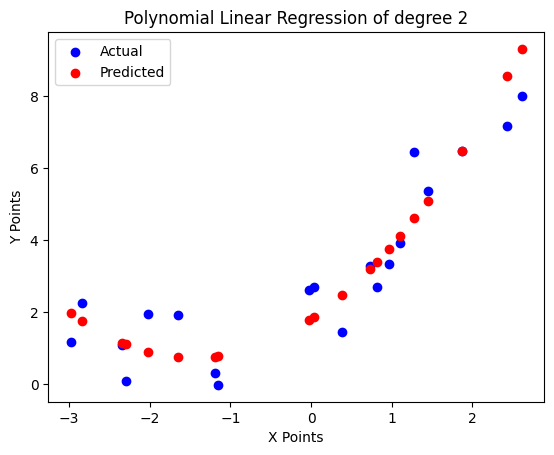

In [57]:
# Scatter plot for the test data and predictions
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_predict2, color='red', label='Predicted')
plt.xlabel('X Points')
plt.ylabel('Y Points')
plt.legend()
plt.title('Polynomial Linear Regression of degree 2')
plt.show()


## **POLYNOMIAL REGRESSION FOR DEGREE = 3**

In [58]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
p3=PolynomialFeatures(degree=3, include_bias=True)
x_train_p3=p3.fit_transform(x_train)
x_test_p3=p3.transform(x_test)

In [60]:
x_train_p3

array([[ 1.00000000e+00,  1.67134320e+00,  2.79338808e+00,
         4.66871017e+00],
       [ 1.00000000e+00,  7.31626212e-01,  5.35276915e-01,
         3.91622621e-01],
       [ 1.00000000e+00,  2.79046827e+00,  7.78671317e+00,
         2.17285760e+01],
       [ 1.00000000e+00, -2.12758513e+00,  4.52661848e+00,
        -9.63076617e+00],
       [ 1.00000000e+00, -1.51068573e+00,  2.28217136e+00,
        -3.44764370e+00],
       [ 1.00000000e+00,  2.98764019e+00,  8.92599390e+00,
         2.66676581e+01],
       [ 1.00000000e+00, -1.06753236e+00,  1.13962534e+00,
        -1.21658693e+00],
       [ 1.00000000e+00, -1.36750809e+00,  1.87007837e+00,
        -2.55734729e+00],
       [ 1.00000000e+00,  6.35295543e-02,  4.03600427e-03,
         2.56405553e-04],
       [ 1.00000000e+00, -2.25376508e+00,  5.07945702e+00,
        -1.14479028e+01],
       [ 1.00000000e+00,  5.73980737e-01,  3.29453886e-01,
         1.89100184e-01],
       [ 1.00000000e+00,  2.45565142e+00,  6.03022389e+00,
      

In [61]:
x_test_p3

array([[ 1.00000000e+00, -1.15011221e+00,  1.32275810e+00,
        -1.52132024e+00],
       [ 1.00000000e+00, -2.84430384e+00,  8.09006432e+00,
        -2.30106010e+01],
       [ 1.00000000e+00,  2.61045354e+00,  6.81446771e+00,
         1.77888514e+01],
       [ 1.00000000e+00,  1.44598457e+00,  2.09087139e+00,
         3.02336777e+00],
       [ 1.00000000e+00,  8.19367552e-01,  6.71363186e-01,
         5.50093211e-01],
       [ 1.00000000e+00,  1.28269642e+00,  1.64531010e+00,
         2.11043337e+00],
       [ 1.00000000e+00,  3.54173405e-02,  1.25438801e-03,
         4.44270873e-05],
       [ 1.00000000e+00,  2.43101878e+00,  5.90985229e+00,
         1.43669619e+01],
       [ 1.00000000e+00, -2.34013490e+00,  5.47623137e+00,
        -1.28151202e+01],
       [ 1.00000000e+00,  7.36142092e-01,  5.41905180e-01,
         3.98919213e-01],
       [ 1.00000000e+00,  1.87072249e+00,  3.49960263e+00,
         6.54678534e+00],
       [ 1.00000000e+00, -2.97872370e+00,  8.87279491e+00,
      

In [62]:
reg_model3=LinearRegression()
reg_model3.fit(x_train_p3,y_train)
y_predict3=reg_model3.predict(x_test_p3)
score3=r2_score(y_test, y_predict3)
print(score3)

0.8604290064713662


In [63]:
print(reg_model3.coef_)
print(reg_model3.intercept_)

[[ 0.          1.60384926  0.52027682 -0.01627543]]
[1.82301216]


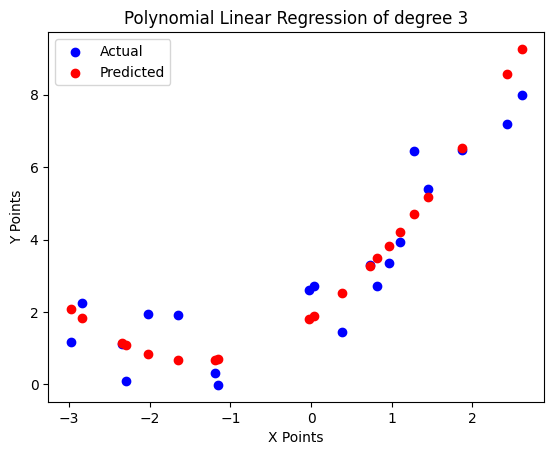

In [64]:
# Scatter plot for the test data and predictions
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.scatter(x_test, y_predict3, color='red', label='Predicted')
plt.xlabel('X Points')
plt.ylabel('Y Points')
plt.legend()
plt.title('Polynomial Linear Regression of degree 3')
plt.show()


### **SIMPLE LINEAR REGRESSION WITH 250 RANDOM VARIABLES** ###

Text(0, 0.5, 'Y points')

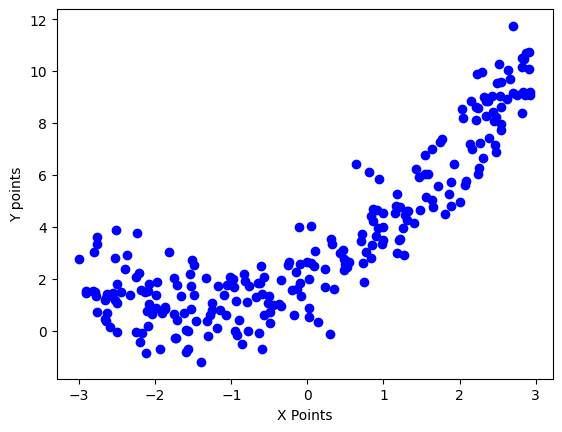

In [65]:
x=6 * np.random.rand(250,1)-3
y=0.5 * x**2 + 1.5*x + 2 + np.random.randn(250,1)  #Quadratic equation used
plt.scatter(x,y,color='b')
plt.xlabel('X Points')
plt.ylabel('Y points')

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=14)

from sklearn.linear_model import LinearRegression
reg_model1=LinearRegression()

reg_model1.fit(x_train,y_train)

LinearRegression()

In [67]:
from sklearn.metrics import r2_score
score1=r2_score(y_test,reg_model1.predict(x_test))
print(score1)


0.7233061158286545


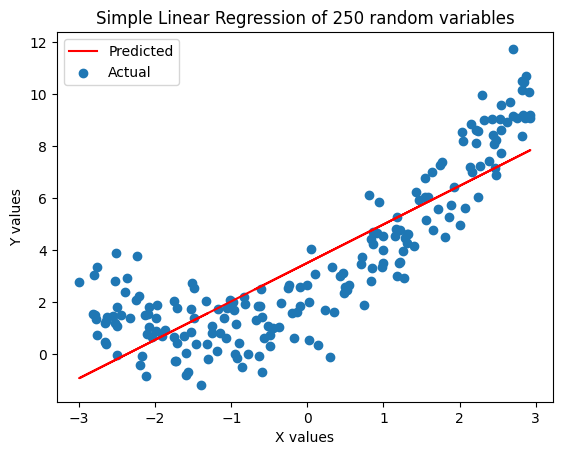

In [68]:
plt.plot(x_train,reg_model1.predict(x_train),color='r', label='Predicted')
plt.scatter(x_train,y_train, label='Actual')
plt.xlabel("X values")
plt.ylabel("Y values")
plt.title("Simple Linear Regression of 250 random variables")
plt.legend()
plt.show()